# The objective of the project is to learn how to implement a simple image classification
pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this
assignment are as follows:
● Understand the basic Image Classification pipeline and the data-driven
approach (train/predict stages)
● Data fetching and understand the train/val/test splits.
● Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5
points)
● Print the classification metric report (2.5 points)
● Implement and apply a deep neural network classifier including (feedforward
neural network, RELU activations) (5 points)
● Understand and be able to implement (vectorized) backpropagation (cost
stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)
● Implement batch normalization for training the neural network (2.5 points)
● Understand the differences and trade-offs between traditional and NN
classifiers with the help of classification metrics (5 points) 

In [2]:
# imports
import pandas as pd
import numpy as np
import tensorflow as tf
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn import model_selection

Using TensorFlow backend.


# KNN implementation

In [3]:
# loading & understanding data
h5f = h5py.File('SVHN_single_grey1.h5', 'r') # opened as read only

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
x_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
# Close the file
h5f.close()

In [4]:
print("shape of train features",x_train.shape)
print("shape of train labels",y_train.shape)

print("shape of validataion features",x_val.shape)
print("shape of validataion labels",y_val.shape)

print("shape of test features",x_test.shape)
print("shape of test labels",y_test.shape)

shape of train features (42000, 32, 32)
shape of train labels (42000,)
shape of validataion features (60000, 32, 32)
shape of validataion labels (60000,)
shape of test features (18000, 32, 32)
shape of test labels (18000,)


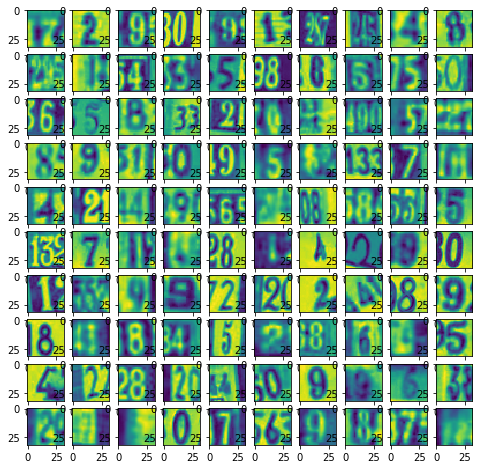

In [5]:
# visualising first few images 
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [6]:
# Data normalisation
x_train /= 255
x_val /= 255
x_test /= 255

In [7]:
# Flatening the input data from 32*32 to 1024 to fit to KNN model
train_sample_rows = x_train.shape[0]
x_tr = []
for i in range(train_sample_rows):
    x_tr.append(x_train[i,:].flatten())

    validation_sample_rows = x_val.shape[0]
x_vl = []
for i in range(validation_sample_rows):
    x_vl.append(x_val[i,:].flatten())
    
test_sample_rows = x_test.shape[0]
x_te = []
for i in range(test_sample_rows):
    x_te.append(x_test[i,:].flatten())


print("shape of new training data set after flattening",len(x_tr),len(x_tr[0]))

print("shape of new validation data set after flattening",len(x_vl),len(x_vl[0]))

print("shape of new test data set after flattening",len(x_te),len(x_te[0]))

shape of new training data set after flattening 42000 1024
shape of new validation data set after flattening 60000 1024
shape of new test data set after flattening 18000 1024


In [24]:
# KNN implementation
NN = KNeighborsClassifier(n_neighbors = 7)
NN.fit(x_tr, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [25]:
x_vl_KNN = x_vl[:10000]
y_val_KNN = y_val[:10000]
x_vl_KNN[0]   # taking fewer samples due to time complexity involved in calculating the accuracy for larger number of samples.


array([0.17372157, 0.18039177, 0.20129648, ..., 0.0840902 , 0.08164353,
       0.07874981], dtype=float32)

In [26]:
NN.score(x_vl_KNN,y_val_KNN) # accuracy score on validation data

0.7397

In [27]:
x_te_KNN = x_te[:10000]
y_test_KNN = y_test[:10000]
x_te_KNN[0]   # taking fewer samples due to time complexity involved in calculating the accuracy for larger number of samples.


array([0.15905097, 0.18349686, 0.19206432, ..., 0.43143883, 0.4360851 ,
       0.44780627], dtype=float32)

In [28]:
NN.score(x_te_KNN,y_test_KNN) # accuracy score on test data

0.5085

In [30]:
# classification metric for KNN model
y_pred = NN.predict(x_te) 

print("KNN model classification Matrix - test\n", confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

KNN model classification Matrix - test
 [[1208   54   43   39   48   57  134   35  101   95]
 [  95 1318   70   92   82   42   34   50   21   24]
 [  94  227  975  132   54   46   31  136   46   62]
 [ 136  253  160  701   58  159   49   47   93   63]
 [ 125  246   58   68 1138   29   55   14   42   37]
 [ 163  159   77  292   65  678  140   33   96   65]
 [ 317  115   41   68  128  162  751   18  185   47]
 [ 106  230  149   85   25   33   32 1084   27   37]
 [ 281  108   78  145   93  141  267   19  589   91]
 [ 350  129   86  113   67   99   79   62  134  685]]
              precision    recall  f1-score   support

           0       0.42      0.67      0.52      1814
           1       0.46      0.72      0.56      1828
           2       0.56      0.54      0.55      1803
           3       0.40      0.41      0.41      1719
           4       0.65      0.63      0.64      1812
           5       0.47      0.38      0.42      1768
           6       0.48      0.41      0.44      1

# Deep neural network implementation

In [52]:
# loading & understanding data
h5f = h5py.File('SVHN_single_grey1.h5', 'r') # opened as read only

# Load the training, test and validation set
x_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
x_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
x_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
# Close the file
h5f.close()

In [53]:
# Converting labels to categorical variables 
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)
valY = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [54]:
trainY[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [55]:
# Feed forward network implemenation with Relu activation function
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization()) # adding batch normalisation layer

#Add hidden lapyers
model.add(tf.keras.layers.Dense(200, activation='relu'))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(80, activation='relu'))

model.add(tf.keras.layers.Dense(60, activation='relu'))

model.add(tf.keras.layers.Dense(30, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compling the model with sgd optimizer & categorical cross entopy loss.
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary() # Displays model summary 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_18 (Dense)             (None, 200)               205000    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_20 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_21 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_22 (Dense)             (None, 30)               

In [56]:
model.fit(x_train,trainY,validation_data=(x_val,valY),epochs=20,batch_size=32) #predicting accuracy on validation data

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 8s 193us/sample - loss: 1.9972 - accuracy: 0.2836 - val_loss: 1.5258 - val_accuracy: 0.5039
Epoch 2/20
42000/42000 [==============================] - 7s 173us/sample - loss: 1.2990 - accuracy: 0.5773 - val_loss: 1.1607 - val_accuracy: 0.6313
Epoch 3/20
42000/42000 [==============================] - 7s 172us/sample - loss: 1.0505 - accuracy: 0.6636 - val_loss: 0.8667 - val_accuracy: 0.7334
Epoch 4/20
42000/42000 [==============================] - 7s 174us/sample - loss: 0.9235 - accuracy: 0.7094 - val_loss: 0.7868 - val_accuracy: 0.7545
Epoch 5/20
42000/42000 [==============================] - 9s 204us/sample - loss: 0.8458 - accuracy: 0.7327 - val_loss: 0.7045 - val_accuracy: 0.7861
Epoch 6/20
42000/42000 [==============================] - 9s 203us/sample - loss: 0.7909 - accuracy: 0.7523 - val_loss: 0.6662 - val_accuracy: 0.7969
Epoch 7/20
42000/42000 [==========================

In [70]:
print("model accuracy",model.evaluate(x_test,testY)) # model accuracy on test data

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

model accuracy [0.5738691577249103, 0.83383334]


In [71]:
# classification metric for DNN for test data
y_pred_NN = model.predict_classes(x_test)
print("DNN model classification Matrix - test\n", confusion_matrix(y_test,y_pred_NN))  
print(classification_report(y_test,y_pred_NN))

DNN model classification Matrix - test
 [[1618   17    6   24   29    4   18   31   21   46]
 [  30 1535   14   42   75    8   11   86   18    9]
 [  23   24 1447   59   25   15    5  158   19   28]
 [  18   27   27 1366   24  128   20   62   25   22]
 [  21   48   24   16 1618   18   19   26    5   17]
 [  25   15   13  107   21 1464   42   24   35   22]
 [  51   20   15   30   52   74 1486   24   67   13]
 [  14   40   29   23   19   10    4 1652    4   13]
 [  46   38   34   63   31   47   88   24 1411   30]
 [  89   37   29   60   27   60   16   35   39 1412]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1814
           1       0.85      0.84      0.85      1828
           2       0.88      0.80      0.84      1803
           3       0.76      0.79      0.78      1719
           4       0.84      0.89      0.87      1812
           5       0.80      0.83      0.81      1768
           6       0.87      0.81      0.84      1

# KNN implementation & result observations.
- Since its an instance based algorithm, it took more than an hour to get test results.(Had to reduce the number of samples to 10000 only as for the entire data set it was taking more than couple of hours to come up with predictions). We can say that it takes a lot of time for calculations involved.
- It just gives an accuracy of just better than random chance which is aound ~51%
- so, not suitable for image classifications or sparse data set.
- Even the precision and recall values are just average.

# DNN implementation & result observation
- With a simple DNN implementation with batch normalisation, relu as activation function, categorical cross entopy as loss function, and with only 20 epochs , we are seeing a an accuracy of 87% on valuation data. 
- time taken for training & testing , both are very less. (less than 5 mins)
- Testing accuracy is around 83%. So, it is generalising very well.
- Precision and accuracy scores are beter. 
